# Plots for the paper

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('DRACOS.csv') 


# exclude 2026 papers
df = df[df['Publication Year'] != 2026]

In [3]:
count_stability_reliability = df["Manual Tags"].str.contains("#faults-reliability")
count_forecasting = df["Manual Tags"].str.contains("#forecasting")
count_optimization_control = df["Manual Tags"].str.contains("#optimization-control")
count_grid_analysis = df["Manual Tags"].str.contains("#grid-analysis")
count_cybersecurity = df["Manual Tags"].str.contains("#cybersecurity")
count_data_management = df["Manual Tags"].str.contains("#data-management")

In [4]:
print("Fault Diagnosis and Reliability:", count_stability_reliability.sum())
print("Load and Renewable Energy Forecasting:", count_forecasting.sum())
print("Optimization and Control:", count_optimization_control.sum())
print("Grid Analysis and Monitoring:", count_grid_analysis.sum())
print("Cybersecurity Applications:", count_cybersecurity.sum())
print("Data Management and Integration:", count_data_management.sum())  

Fault Diagnosis and Reliability: 178
Load and Renewable Energy Forecasting: 154
Optimization and Control: 128
Grid Analysis and Monitoring: 90
Cybersecurity Applications: 48
Data Management and Integration: 30


In [5]:
mapping = {
    "Fault Diagnosis, Stability and Reliability": count_stability_reliability.sum(),
    "Forecasting": count_forecasting.sum(),
    "Optimization and Control": count_optimization_control.sum(),
    "Grid Analysis and State Estimation": count_grid_analysis.sum(),
    "Cybersecurity": count_cybersecurity.sum(),
    "Data Management": count_data_management.sum()
}

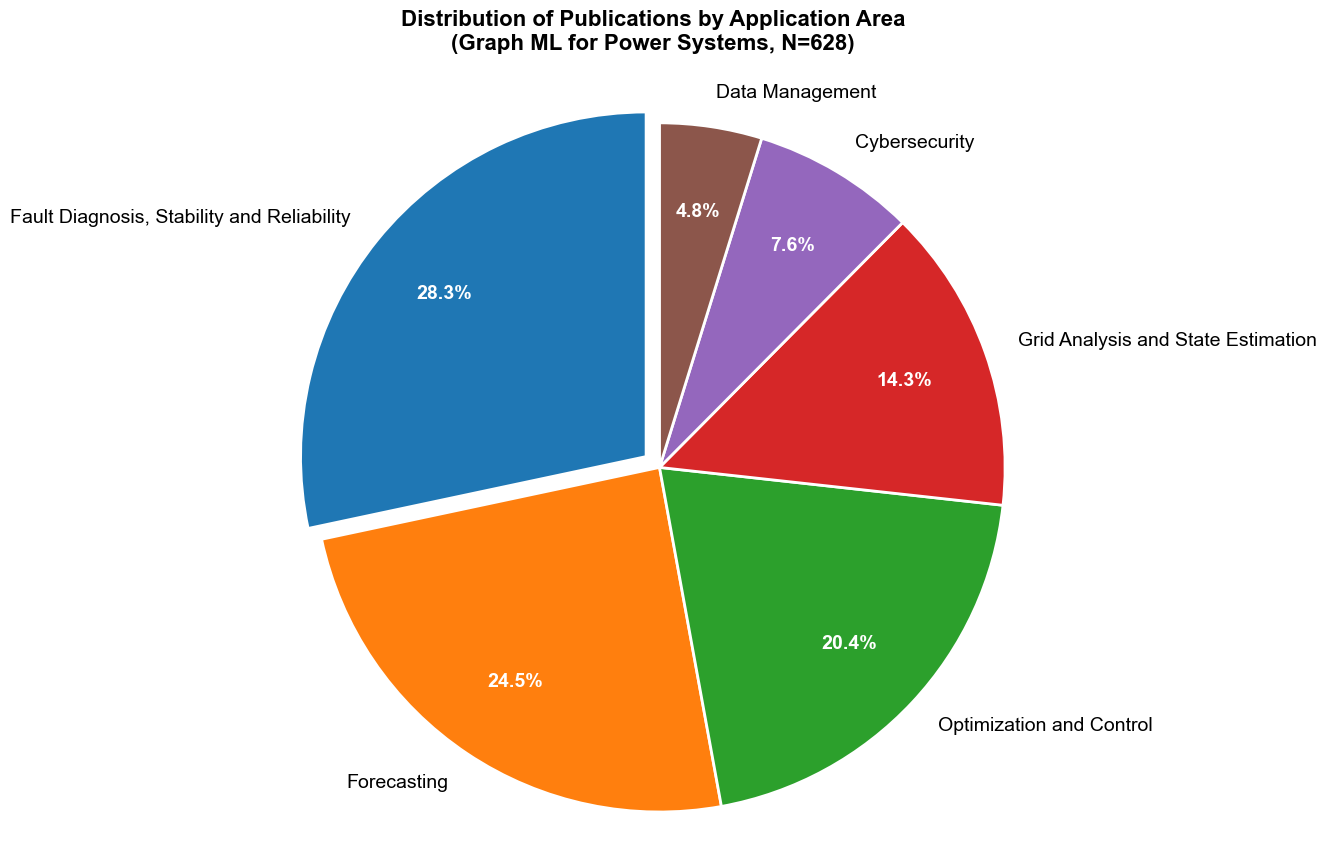

In [6]:
data = mapping

sizes = list(data.values())
labels = list(data.keys())
total_n = sum(sizes)

# --- 2. Professional Style Setup ---
# Font: Arial is the standard safe substitute for Helvetica
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial', 'Helvetica', 'DejaVu Sans']
plt.rcParams['font.size'] = 14 

# --- 3. Color Palette & Luminance Helper ---
# Use 'tab10' for distinct, professional colors
colors = plt.cm.tab10.colors


# --- 4. Plotting ---
fig, ax = plt.subplots(figsize=(10, 10)) # Square figure for a perfect circle

# Explode the largest slice slightly for emphasis
max_index = sizes.index(max(sizes))
explode = [0.05 if i == max_index else 0 for i in range(len(sizes))]

wedges, texts, autotexts = ax.pie(
    sizes,
    explode=explode,
    labels=labels,
    colors=colors,
    autopct='%1.1f%%',
    startangle=90,
    pctdistance=0.75, # Move percentages slightly closer to the center
    labeldistance=1.1, # Move category labels slightly out to prevent overlap
    textprops={'fontsize': 14}, 
    # PROFESSIONAL TOUCH: Use a white edge instead of a shadow for a clean "cutout" look
    wedgeprops={'linewidth': 2, 'edgecolor': 'white'}
)

# --- 5. Advanced Label Styling ---
# Apply the "Smart Contrast" logic to percentage labels
for i, autotext in enumerate(autotexts):
    autotext.set_color("white")
    autotext.set_weight('bold')
    autotext.set_fontsize(14)

# --- 6. Title and Final Touches ---
ax.set_title(
    f'Distribution of Publications by Application Area\n(Graph ML for Power Systems, N={total_n})',
    fontsize=16,
    fontweight='bold',
    pad=20
)

# Ensure the pie is a perfect circle
ax.axis('equal')

# --- 7. Save High-Quality Output ---
plt.savefig('applications_overview.png', dpi=600, bbox_inches='tight')

# Also save as PDF (Vector) - Best for the actual paper submission
plt.savefig('applications_overview.pdf', bbox_inches='tight')

plt.show()

In [7]:
publications_per_year = df['Publication Year'].value_counts().sort_index()

In [8]:
print(publications_per_year)

Publication Year
2018.0      1
2019.0      4
2020.0     12
2021.0     22
2022.0     54
2023.0     93
2024.0    225
2025.0    239
Name: count, dtype: int64


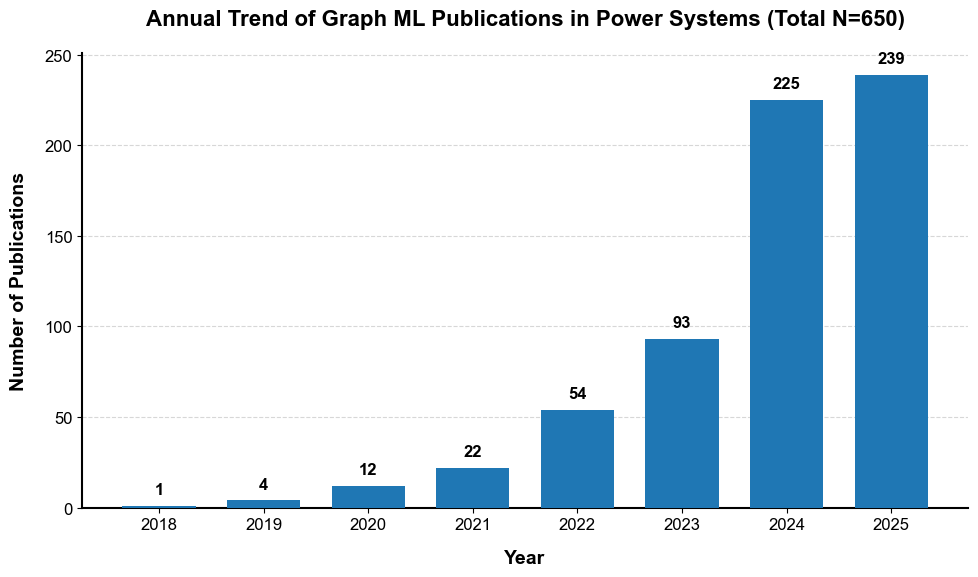

In [9]:
# --- 2. Professional Style Setup ---
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial', 'Helvetica', 'DejaVu Sans']
plt.rcParams['font.size'] = 14
plt.rcParams['axes.linewidth'] = 1.5 # Thicker axes for better visibility

# --- 3. Plotting ---
fig, ax = plt.subplots(figsize=(10, 6)) # Rectangular aspect ratio is better for time series

# Use a single professional color (First color of tab10 is a nice deep blue)
# 'zorder=3' ensures bars are drawn ON TOP of the grid lines
bars = ax.bar(
    publications_per_year.index, 
    publications_per_year.values, 
    color=plt.cm.tab10.colors[0], 
    width=0.7, 
    zorder=3 
)

# --- 4. Professional Formatting ---

# A. Clean Spines: Remove top and right borders (Tufte style)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# B. Grid: Add a subtle horizontal grid behind the bars for readability
ax.grid(axis='y', linestyle='--', alpha=0.5, zorder=0)

# C. Labels and Titles
ax.set_ylabel('Number of Publications', fontsize=14, fontweight='bold', labelpad=12)
ax.set_xlabel('Year', fontsize=14, fontweight='bold', labelpad=12)

# Set the title
total_pubs = publications_per_year.sum()
ax.set_title(
    f'Annual Trend of Graph ML Publications in Power Systems (Total N={total_pubs})',
    fontsize=16,
    fontweight='bold',
    pad=20
)

# D. Axis Ticks: Ensure every year is labeled if the range allows
ax.set_xticks(publications_per_year.index)
ax.tick_params(axis='both', which='major', labelsize=12)

# --- 5. Add Value Labels on Top of Bars ---
# This is crucial for publications: readers want to know the exact count without guessing.
for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2., 
        height + 0.02 * max(publications_per_year.values), # Offset slightly above bar
        f'{int(height)}',
        ha='center', 
        va='bottom', 
        fontsize=12, 
        fontweight='bold',
        color='black'
    )

# --- 6. Save High-Quality Output ---
plt.tight_layout()

# Save as PNG (Raster) at high DPI
plt.savefig('publications_per_year.png', dpi=600, bbox_inches='tight')

# Save as PDF (Vector) - Best for the paper submission
plt.savefig('publications_per_year.pdf', bbox_inches='tight')

plt.show()